# 1) Daily Stats S&P500 using yfinance API
* API: https://pypi.org/project/yfinance/ 
* Check the stats in the UI: https://finance.yahoo.com/quote/%5EGSPC

In [22]:
import yfinance as yf
from pandas_datareader import data as pdr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [23]:
# Download historical data for SNP500 using YFinance
# https://finance.yahoo.com/quote/%5EGSPC
tickers = ['^GSPC']

start_date = "2000-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

print("Downloading historical data...")
yf_snp500_df = yf.download(tickers, 
                   start=start_date, 
                   end=end_date)
                #    multi_level_index=False)

# Get latest prices from the downloaded data
latest_date = yf_snp500_df.index[-1]
latest_prices = yf_snp500_df.iloc[-1]

[*********************100%%**********************]  1 of 1 completed


In [24]:
yf_snp500_df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [25]:
yf_snp500_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-11-18,5874.169922,5908.120117,5865.950195,5893.620117,5893.620117,3983860000
2024-11-19,5870.049805,5923.509766,5855.290039,5916.979980,5916.979980,4036940000
2024-11-20,5914.339844,5920.669922,5860.560059,5917.109863,5917.109863,3772620000
2024-11-21,5940.580078,5963.319824,5887.259766,5948.709961,5948.709961,4230120000
2024-11-22,5944.359863,5972.899902,5944.359863,5969.339844,5969.339844,4141420000


<Axes: title={'center': 'S&P500 Daily Close Price from 2020'}, xlabel='Date'>

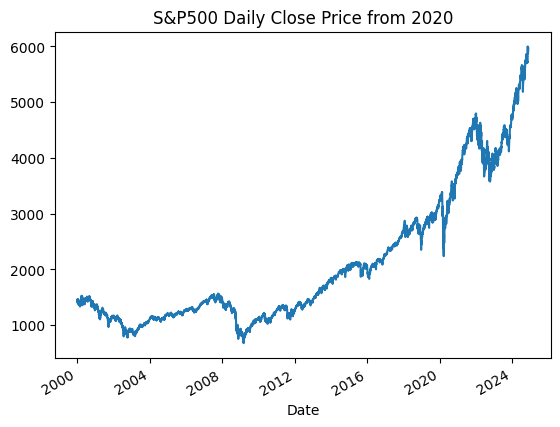

In [26]:
yf_snp500_df['Close'].plot.line(title="S&P500 Daily Close Price from 2020")

## 2) Daily S&P 500 stats using Pandas DataReader from FRED (Federal Reserve Bank of St. Louis)
* FRED is a database of over 267,000 economic time series from 80 sources
* it is a Python wrapper of FRED's API  
* if you want to download directly from API, here is an example: https://datons.ai/download-and-analyze-fred-data-automatically-with-python/

In [27]:
# download using Pandas DataReader / FRED Datasource
# URL: https://fred.stlouisfed.org/series/SP500
metric_code = "SP500"
fred_snp500_df = pdr.DataReader(metric_code, "fred", start=start_date)


In [39]:
fred_snp500_df.tail(10)

,SP500
DATE,
2024-11-11,6001.35
2024-11-12,5983.99
2024-11-13,5985.38
2024-11-14,5949.17
2024-11-15,5870.62
2024-11-18,5893.62
2024-11-19,5916.98
2024-11-20,5917.11
2024-11-21,5948.71


## 3) Minute data of S&P 500 from YFinance
* we'll use BTC-USD minute data for the dashboards, as it is updated 24/7, and not only during the trading hours of the NYSE stock exchange 

In [29]:
# Minute data SNP500

# Calculate start date (limited to 7 days for minute data)
days_back = 5
end_date = datetime.now()
start_date = end_date - timedelta(days=min(days_back, 7))
    
# Fetch minute data
# interval options: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# Create ticker object for S&P500
sp500 = yf.Ticker("^GSPC")
df = sp500.history(start=start_date, end=end_date, interval='1m')
    
# Convert timezone-aware index to timezone-naive for consistent processing
df.index = df.index.tz_localize(None)

In [30]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

# Creating a sample dataframe for demonstration purposes
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-11-22 15:55:00,5969.689941,5972.899902,5969.220215,5969.990234,24892000,0.0,0.0
2024-11-22 15:56:00,5969.930176,5970.240234,5969.189941,5969.919922,22159000,0.0,0.0
2024-11-22 15:57:00,5969.919922,5971.910156,5969.919922,5970.470215,24578000,0.0,0.0
2024-11-22 15:58:00,5970.580078,5972.330078,5970.580078,5971.450195,33838000,0.0,0.0
2024-11-22 15:59:00,5971.549805,5972.129883,5967.830078,5968.259766,69120000,0.0,0.0


In [31]:
# df.index = pd.to_datetime(df['index'])

# Plotting the line plot using plotly express
fig = px.line(df, x=df.index, y='Close')
fig.update_layout(title=f"SNP&500 Close Price Minute Data for the Last {days_back} days")

In [32]:
# first value
first_value = df.head(1).Close.to_numpy()[0]
first_value

5914.330078125

In [33]:
# first datetime
first_datetime = df.head(1).index.to_numpy()[0]
first_datetime

numpy.datetime64('2024-11-20T09:30:00.000000000')

In [34]:
# growth to the first value
df['Growth'] = 100.0 * df.Close/first_value

In [35]:
# Plotting the line plot using plotly express
fig = px.line(df, x=df.index, y='Growth')
fig.update_layout(title = f"SNP&500 GROWTH Minute Data since {first_datetime}")


In [36]:
# lat values as a table
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Growth
Datetime,,,,,,,,
2024-11-22 15:55:00,5969.689941,5972.899902,5969.220215,5969.990234,24892000,0.0,0.0,100.941107
2024-11-22 15:56:00,5969.930176,5970.240234,5969.189941,5969.919922,22159000,0.0,0.0,100.939918
2024-11-22 15:57:00,5969.919922,5971.910156,5969.919922,5970.470215,24578000,0.0,0.0,100.949222
2024-11-22 15:58:00,5970.580078,5972.330078,5970.580078,5971.450195,33838000,0.0,0.0,100.965792
2024-11-22 15:59:00,5971.549805,5972.129883,5967.830078,5968.259766,69120000,0.0,0.0,100.911848


In [37]:
# Saving data to a file
from sqlalchemy import create_engine
import os

# Directory to save data
DATA_DIR = 'data'

# Ensure data directory exists
os.makedirs(DATA_DIR, exist_ok=True)

# SQLite database path
DB_PATH = os.path.join(DATA_DIR, 'test_data.db')

# Create SQLAlchemy engine
engine = create_engine(f'sqlite:///{DB_PATH}')

In [38]:
# Save to parquet and SQLite
print("\nSaving data to files/DB...")
table_name = 'snp_500_minute_yfinance'
# Save to parquet
df.to_parquet(os.path.join(DATA_DIR, f'{table_name}.parquet'))

# Save to SQLite
df.to_sql('table_name', engine, if_exists='replace')



Saving data to files/DB...


1168